# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='age', ylabel='tardies'>

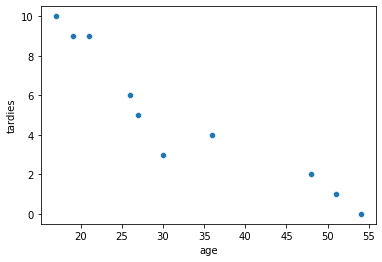

In [2]:
# Your code here.
import seaborn as sns 
sns.scatterplot(x='age', y='tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
'''
The graph shows that there is a negative correlation between number of tardies and the age of student. Therefore this can be the hypothesis.'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [3]:
#correlation
student_data.corr()

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


In [4]:
# Your response here.
student_data.cov()

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


In [ ]:
'''
The covariance and correlation measure the relationship between 2 variables. In this specific case it is age and tardies of students.Covariance descibes the direction of the realashipship, while teh correlation describes both direction and the strength. Correlation values are standarized while covarriance values are not. In case of age and tardies the both parameters show that there is a negative relation thus with increase of age number of tardies decreases. Correlation in this case adds information that this relation is strong.
'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
#First method using scipy
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(student_data.age, student_data.tardies)
slope, intercept, r_value, p_value, std_err


(-0.2428207709159808,
 12.888803363135768,
 -0.9391626886887121,
 5.56665383455343e-05,
 0.03139728816158607)

In [9]:
#second method using statsmodels
import statsmodels.api as sm

X = sm.add_constant(student_data.age) # We must add the intercept using the add_constant function
Y = student_data.tardies

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           5.57e-05
Time:                        11:56:03   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\radek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='age', ylabel='tardies'>

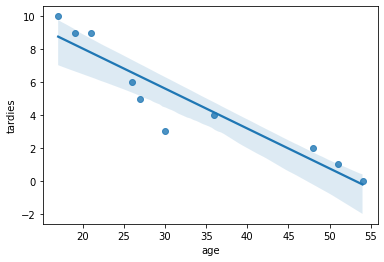

In [5]:
# Your code here.

sns.regplot(x="age", y="tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
'''
In both methods I ecived model which describes the relationship between age and tardies as:

tardies = 12.88 - 0.24*age

the r-square value is equal to 0.88, which means that the model descibres 88% od the data, which is good. 
Additionaly the low values of p-values point ot the significance of the model.
'''


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week6\Day1\vehicles.csv')

In [12]:
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [16]:
# Your response here. 
corelation =data[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corr()
corelation

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


<AxesSubplot:>

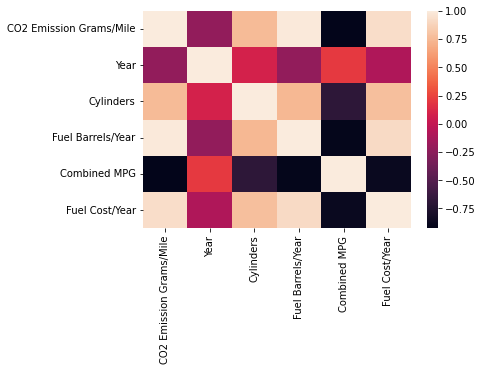

In [17]:
sns.heatmap(corelation, 
        xticklabels=corelation.columns,
        yticklabels=corelation.columns)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
From the correlation matrix I can see that there is a strong positive correlation between CO2 emissions and Fuel Barels/year and Fuel cost per year. there is also possitve correlation between CO2 emissions and Cylinders. Strong negatove correlation can be observed between CO2 emissions and Combined MPG. On the other hand we have weak correaltion between CO2 emissions and Year. Therefore I aasume that the later is teh aprametaer that least influences CO2 emissions, while the other might have a significant influence. 
'''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
# Your response here. 
X = sm.add_constant(data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]) # adding a constant
Y = data['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                             12:23:45   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
'''
The r squared value is equal to adjusted r-saure and is 0.981, which means that the model correctly described 98% of the data, which is high. The F-statistics and p-value are high which idicate that the error is high too but at the same time p-value is smaller than 0.05 pointing to the fact that the model is significant. 
When it comes to each paramter, ismilar as in correlation we can observe that the CO2 emissions increase with the increase of cylinders fuel barrels per year and fuel cost per year. On the other hand the CO2 emissions decrease with th increase of year and the combined MPG. The biggest influence on CO2 emssions in thsi model have Fuels Barrels per Year.
'''

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here. 
party = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

In [22]:
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

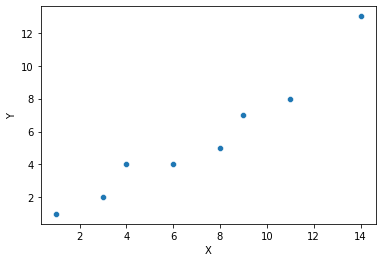

In [21]:
# Your code here.
sns.scatterplot(x='X',y='Y',data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
'''
It seems that there is alinear realtionship between the variables. I can confirm it by calculating correlation and then by creating linear regassion model
'''

In [23]:
party.corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


In [ ]:
'''
I confirmed that there is strong positive correlation
'''

In [24]:
X = sm.add_constant(party.X) # We must add the intercept using the add_constant function
Y = party.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           0.000102
Time:                        12:36:32   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\radek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
'''
The model created is: 

Y = -0.4394 + 0.8485X

R2 is equal to 0.932 so it correctly describes 93% of data. The p-value is lower than 0.05 which point to the significance of the mdoel.
'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<AxesSubplot:xlabel='X', ylabel='Y'>

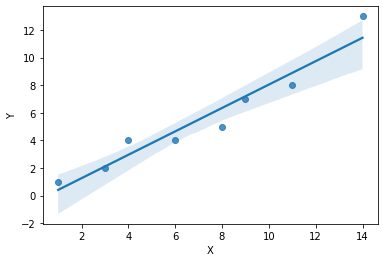

In [27]:
# Your response here. 
sns.regplot(x="X", y="Y", data=party)

{'whiskers': [<matplotlib.lines.Line2D at 0x193e06e2d30>,
 'caps': [<matplotlib.lines.Line2D at 0x193e06f2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x193e06e2a60>],
 'medians': [<matplotlib.lines.Line2D at 0x193e06f28b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x193e06f2b80>],
 'means': []}

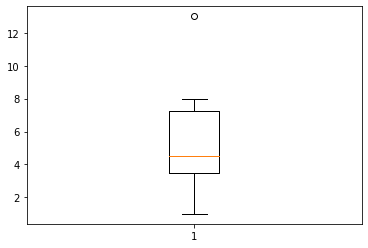

In [30]:
plt.boxplot(party.Y)

From both graph above I can see that the last point in the dataframe can be an outlier thus I will remove it and I will recalculate the model

In [31]:
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [32]:
party.drop([7], inplace=True)

In [33]:
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [34]:
#Correlation is a little bit higher
party.corr()

,X,Y
X,1.000000,0.971278
Y,0.971278,1.000000


In [35]:
X = sm.add_constant(party.X) # We must add the intercept using the add_constant function
Y = party.Y

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           0.000264
Time:                        12:44:22   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\radek\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

<AxesSubplot:xlabel='X', ylabel='Y'>

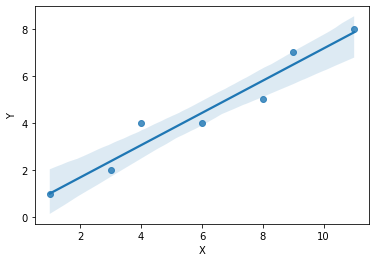

In [36]:
# Your response here. 
sns.regplot(x="X", y="Y", data=party)

In [ ]:
'''
After removing the point the model changed a little now it can be presented by the equation: 

Y= 0.3233 + 0.6842X

Thus now the constant has a positive value. 

The r2 increased a little and the p-value decreased a little, which means that now are model is significant and that it describes 94% of data vs. 93%. 

Nevertheless we improved the model but the diffrences between both of them are not very big.
'''